In [1]:
from Scripts import project_functions as pf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This dataset is about different games sales record across North America, Europe and Japan on different platform.
At first, I am loading the dataset and removing NA values as well as reseting the index

In [2]:
df = pf.load_and_process("../data/raw/vgsales.csv")
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16286,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16287,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16288,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16289,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


## At first, I'm trying to find which platform has performed better worldwide
I'm taking average global sales of games on every platform.

In [15]:
df2 = df.groupby(['Platform']).sum()
df2 = df2.sort_values('Global_Sales', ascending = False) 
df2 = df2.reset_index(col_level = 1)
col_list = ['Platform', 'Global_Sales']
df2 = df2[col_list]
df2
# Show only the global_sales columns
# How many games ps2 released?

,Platform,Global_Sales
0,PS2,1233.46
1,X360,969.60
2,PS3,949.35
3,Wii,909.81
4,DS,818.91
5,PS,727.39
6,GBA,305.62
7,PSP,291.71
8,PS4,278.10
9,PC,254.70


## As we can see Game boy(GB) has been the best perfroming platfrom globally in terms of game sales.
I plotted a box plot to display above information in graphical form.

Text(0.5, 0, 'Global_Sales (in millions)')

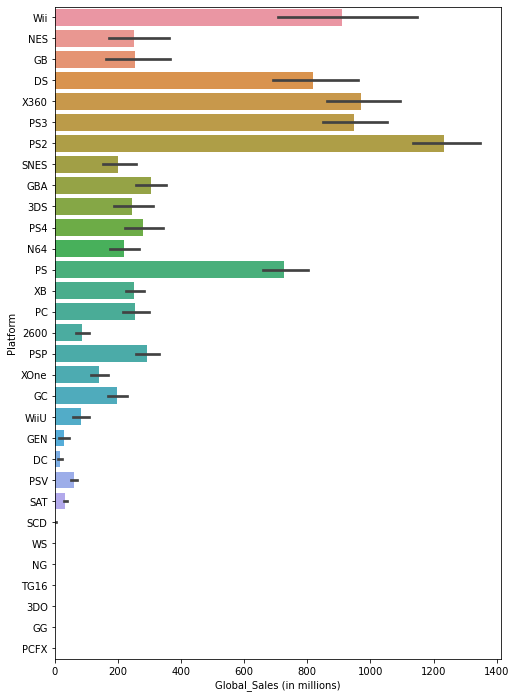

In [17]:
fig, ax = plt.subplots(figsize=(8,12))
sns.barplot(x='Global_Sales', y= 'Platform', data = df, estimator = np.sum)
plt.xlabel('Global_Sales (in millions)')

Text(0.5, 0, 'NA_Sales')

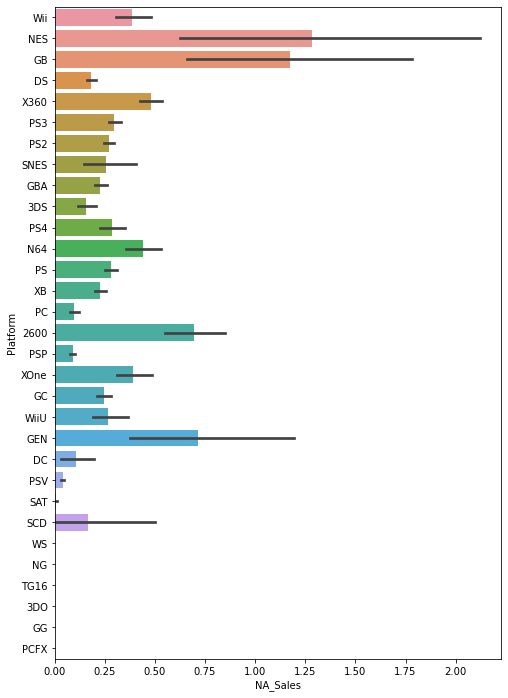

In [5]:
fig, ax = plt.subplots(figsize=(8,12))
sns.barplot(x='NA_Sales', y= 'Platform', data = df)
plt.xlabel('NA_Sales')
# Nintendo Entertainment System(NES) has been the best perfroming platfrom in North America in terms of game sales.

Text(0.5, 0, 'EU_Sales')

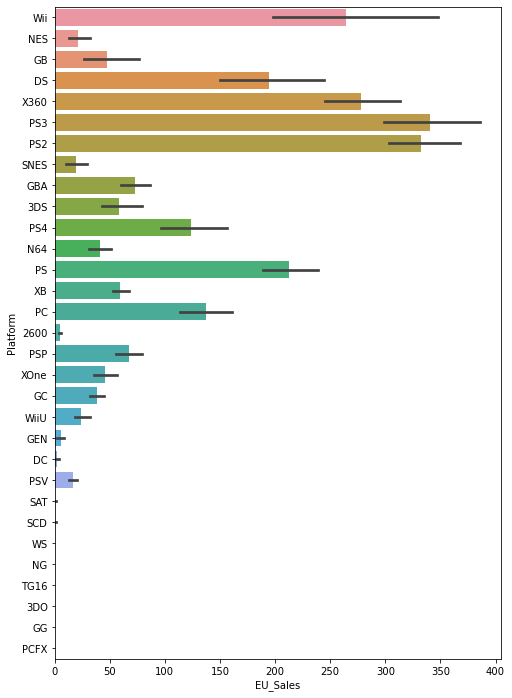

In [18]:
fig, ax = plt.subplots(figsize=(8,12))
sns.barplot(x='EU_Sales', y= 'Platform', data = df, estimator = np.sum)
plt.xlabel('EU_Sales')
# Game Boy(GB) has been the best perfroming platfrom in Europe in terms of game sales.

Text(0.5, 0, 'JP_Sales')

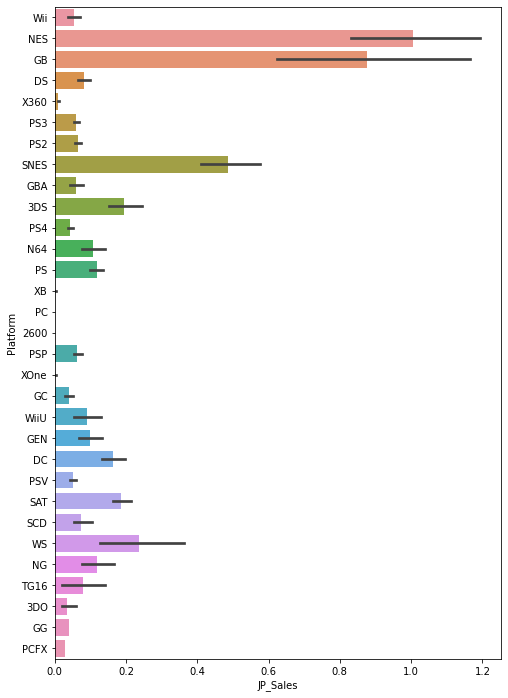

In [7]:
fig, ax = plt.subplots(figsize=(8,12))
sns.barplot(x='JP_Sales', y= 'Platform', data = df)
plt.xlabel('JP_Sales')
# Nintendo Entertainment System(NES) has been the best perfroming platfrom in Japan in terms of game sales.

In [8]:
'''PC has been used worldwide but yet it is not the best perfroming platform. One of the reason I think is that PC games have been facing problem with pirating. Other platform like PS, GB, NES and Xbox it is tough to pirate games.Therefore, many games company sales record are not too high for PC.'''

'PC has been used worldwide but yet it is not the best perfroming platform. One of the reason I think is that PC games have been facing problem with pirating. Other platform like PS, GB, NES and Xbox it is tough to pirate games.Therefore, many games company sales record are not too high for PC.'

Text(0.5, 0, 'Global_Sales')

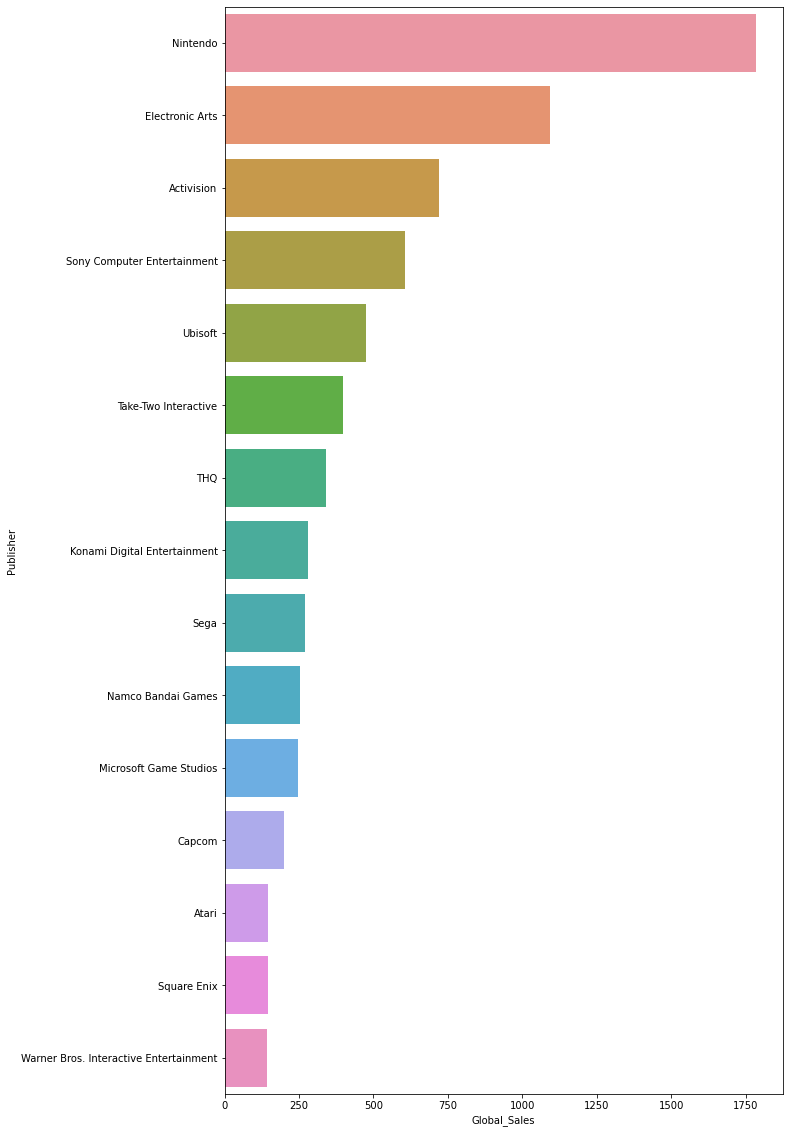

In [19]:
#Which publisher has good sales record throughout years? (as there many publisher let's take top 15)
df3 = df.groupby(['Publisher']).sum()
df3 = df3.sort_values('Global_Sales', ascending = False)
df3 = df3.reset_index(col_level = 1)
sample = df3.head(15)
fig, ax = plt.subplots(figsize=(10,20))
sns.barplot(x='Global_Sales', y='Publisher', data = sample)
plt.xlabel('Global_Sales')
# also see how many games each of them published

'Platform genre has been the popular choice and one of the reason it is so popular is because games like mario\nand donkey kong has been a widely popular game. They were a huge hit with NES and used a lot in arcades. A lot of\npeople who do not game much still might have played mario at some point in their life.'

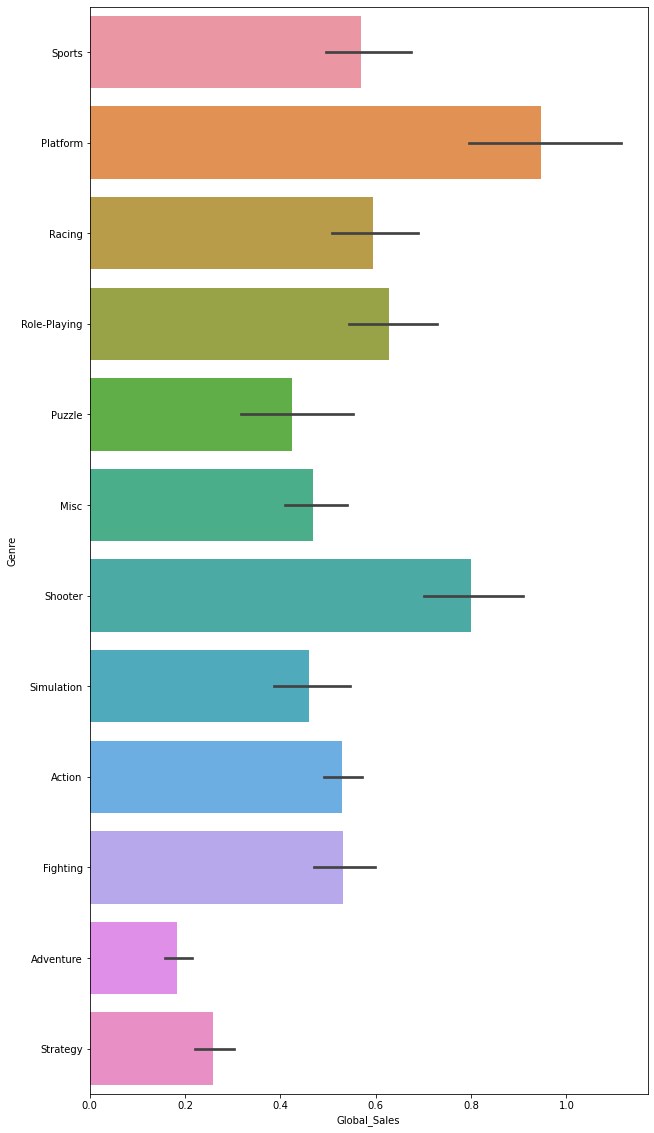

In [10]:
# Which genre has been a popular choice globally?
fig, ax = plt.subplots(figsize=(10,20))
sns.barplot(x='Global_Sales', y='Genre', data = df)
plt.xlabel('Global_Sales')
'''Platform genre has been the popular choice and one of the reason it is so popular is because games like mario
and donkey kong has been a widely popular game. They were a huge hit with NES and used a lot in arcades. A lot of
people who do not game much still might have played mario at some point in their life.'''

In [11]:
# we will use count plot to see which publisher has published most game and compare it with global sales.
# We will try to answer the question does publishing more games means your sale records are going to high globally? (research question 1)
# make a count plot to count the number of games published by each publisher (top 15) compare it with the mean box plot og global sales
col_list = ['Publisher', 'Global_Sales']
df5 = df[col_list]
df5
#sns.countplot(x = 'Publisher', data = df)

,Publisher,Global_Sales
0,Nintendo,82.74
1,Nintendo,40.24
2,Nintendo,35.82
3,Nintendo,33.00
4,Nintendo,31.37
...,...,...
16286,Kemco,0.01
16287,Infogrames,0.01
16288,Activision,0.01
16289,7G//AMES,0.01
